<a href="https://colab.research.google.com/github/VictorFu0717/ml0311/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

卷積(特徵的萃取)：（過濾）以某px為中心，結合附近得值-->新值
邊緣檢測(sobel)

池化(減低計算量)：通常選最大值池化
做幾層要看原圖的大小,大：多層,小：少層

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# mnist: 60000, 28, 28 -> 60000, 28, 28, 1
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
trans = [       
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

horse


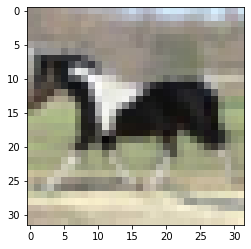

In [ ]:
import random
import matplotlib.pyplot as plt
idx = random.randint(0, 49999)
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten 
#flatten 讓他變成同一個維度
#第一層param: 64 * (1個filter:3x3x3)27 + 64bias = 1792
#第二層param: 128 * (1個filter:3x3x64)576 + 128bias =  73856
layers = [
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [ ]:
#  不需要自己做one-hot
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test/ 255


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
   EarlyStopping(patience=5, restore_best_weights=True),
   ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

#前面的loss,accuracy是train資料分數，後面的是test分數

Epoch 1/50
225/225 - 37s - loss: 1.7568 - accuracy: 0.3472 - val_loss: 1.3330 - val_accuracy: 0.5176
Epoch 2/50
225/225 - 4s - loss: 1.2617 - accuracy: 0.5442 - val_loss: 1.0639 - val_accuracy: 0.6140
Epoch 3/50
225/225 - 4s - loss: 1.0040 - accuracy: 0.6459 - val_loss: 0.8682 - val_accuracy: 0.6962
Epoch 4/50
225/225 - 4s - loss: 0.8377 - accuracy: 0.7075 - val_loss: 0.8290 - val_accuracy: 0.7116
Epoch 5/50
225/225 - 4s - loss: 0.7103 - accuracy: 0.7537 - val_loss: 0.7238 - val_accuracy: 0.7474
Epoch 6/50
225/225 - 4s - loss: 0.5927 - accuracy: 0.7954 - val_loss: 0.6660 - val_accuracy: 0.7790
Epoch 7/50
225/225 - 4s - loss: 0.4961 - accuracy: 0.8290 - val_loss: 0.6877 - val_accuracy: 0.7694
Epoch 8/50
225/225 - 4s - loss: 0.4078 - accuracy: 0.8602 - val_loss: 0.6657 - val_accuracy: 0.7800
Epoch 9/50
225/225 - 4s - loss: 0.3306 - accuracy: 0.8848 - val_loss: 0.7395 - val_accuracy: 0.7720
Epoch 10/50
225/225 - 4s - loss: 0.2587 - accuracy: 0.9106 - val_loss: 0.7374 - val_accuracy: 0.789

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6987 - accuracy: 0.7679


[0.6987046003341675, 0.7678999900817871]

In [ ]:
pre = model.predict_classes(x_test_norm)
pre

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 8, 9, ..., 5, 1, 7])

In [ ]:
y_test_r = y_test.reshape(-1)
y_test_r.shape

(10000,)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/predict_classes
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat,
       columns=[trans[i] + "(預測)" for i in range(10)],
       index=[trans[i] + "(正確)" for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),770,21,48,23,8,8,5,12,65,40
automobile(正確),8,868,5,4,0,3,4,3,15,90
bird(正確),45,5,740,53,34,43,37,26,9,8
cat(正確),14,6,82,613,36,138,48,32,7,24
deer(正確),12,1,126,68,631,42,34,75,8,3
dog(正確),4,3,65,165,19,666,14,48,5,11
frog(正確),3,3,76,49,16,19,814,6,5,9
horse(正確),10,1,32,40,23,40,4,837,3,10
ship(正確),32,22,10,17,3,5,7,1,868,35
truck(正確),24,59,4,8,1,6,6,9,11,872


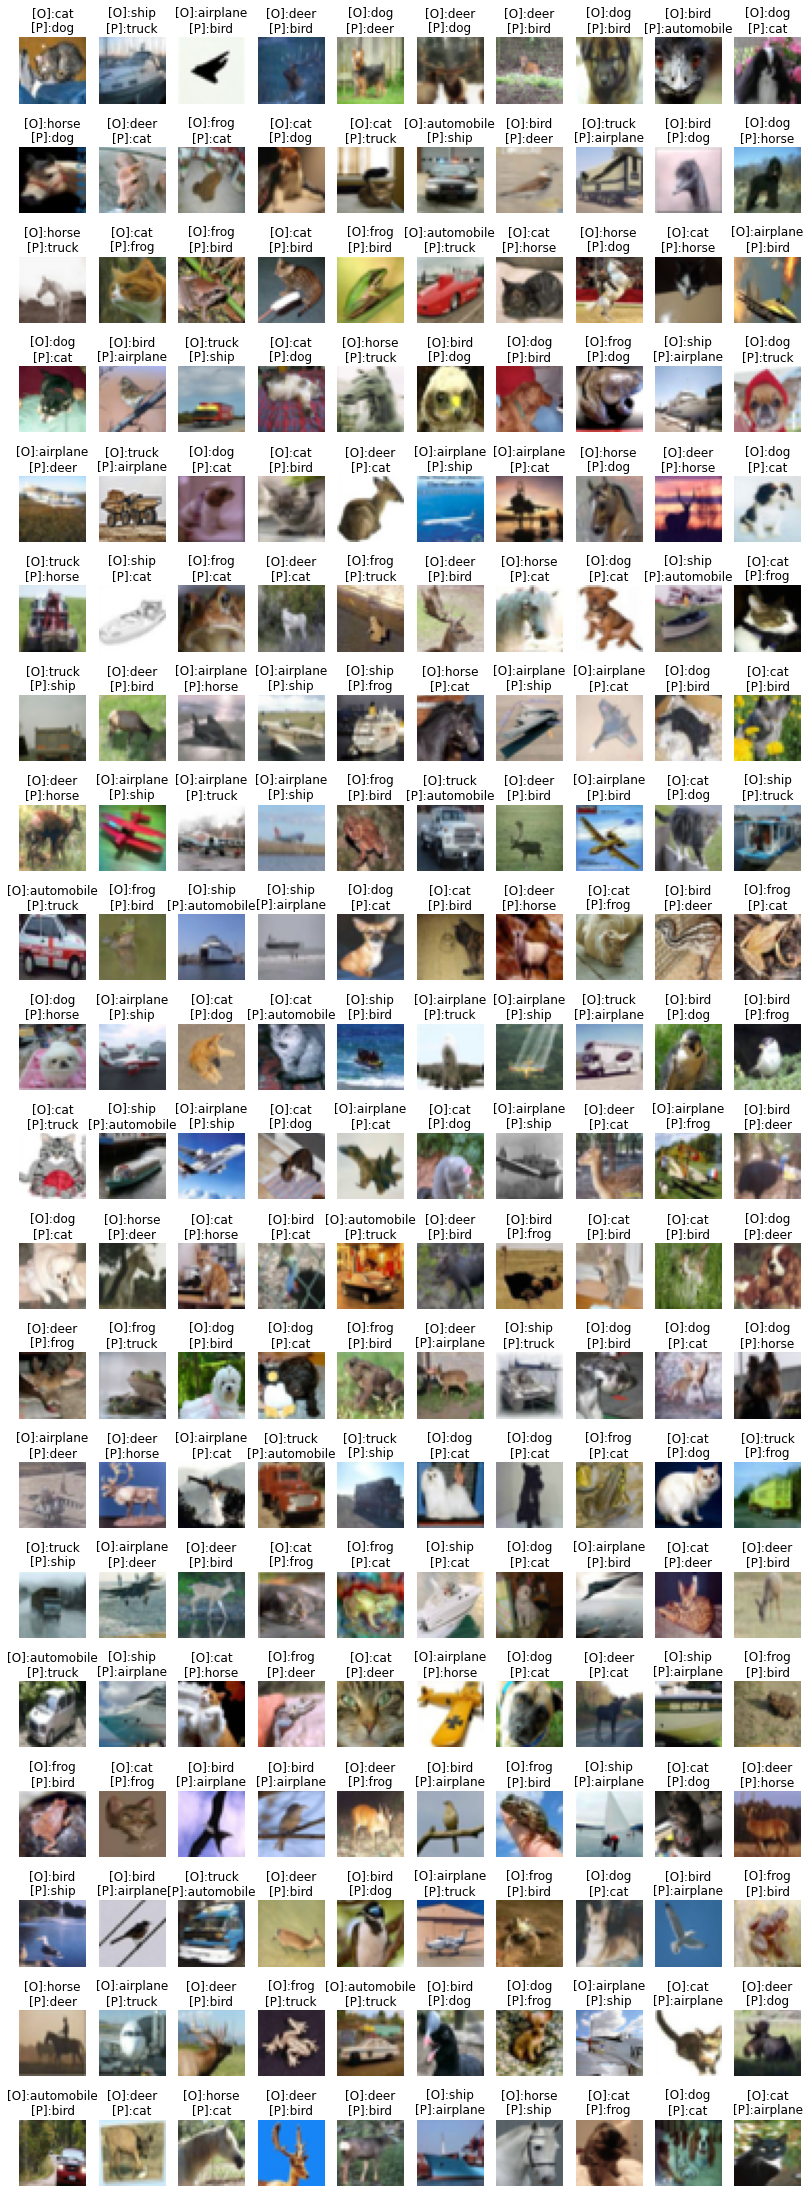

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0][:200]
false_img = x_test[idx]
false_pre = pre[idx]
false_label = y_test_r[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# Pillow
import requests
from PIL import Image
# RGB, RGBA, L(gray)
url = input("url:")
headers = {
  "user-agent":"user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"  
}
response = requests.get(url, headers=headers, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 32, 32, 3) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(trans[i], "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", trans[ans])
plt.imshow(img_np)

KeyboardInterrupt: ignored